In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n=100, ro=2):
    x1 = np.random.multivariate_normal(mean=[0,0], cov=np.identity(2),size=n)
    x2 = np.random.multivariate_normal(mean=[ro,ro], cov=np.identity(2),size=n)
    y1 = np.array([1 for i in range(n)])
    y2 = np.array([-1 for i in range(n)])
    y = np.concatenate((y1,y2))
    x = np.concatenate((x1,x2))
    idx = np.random.permutation(2*n)
    x = x[idx,:]
    y = y[idx]
    return x,y

def sgn(x):
    return x / abs(x)

def accuracy(y, y_hat):
    return sum(y == y_hat)/len(y)

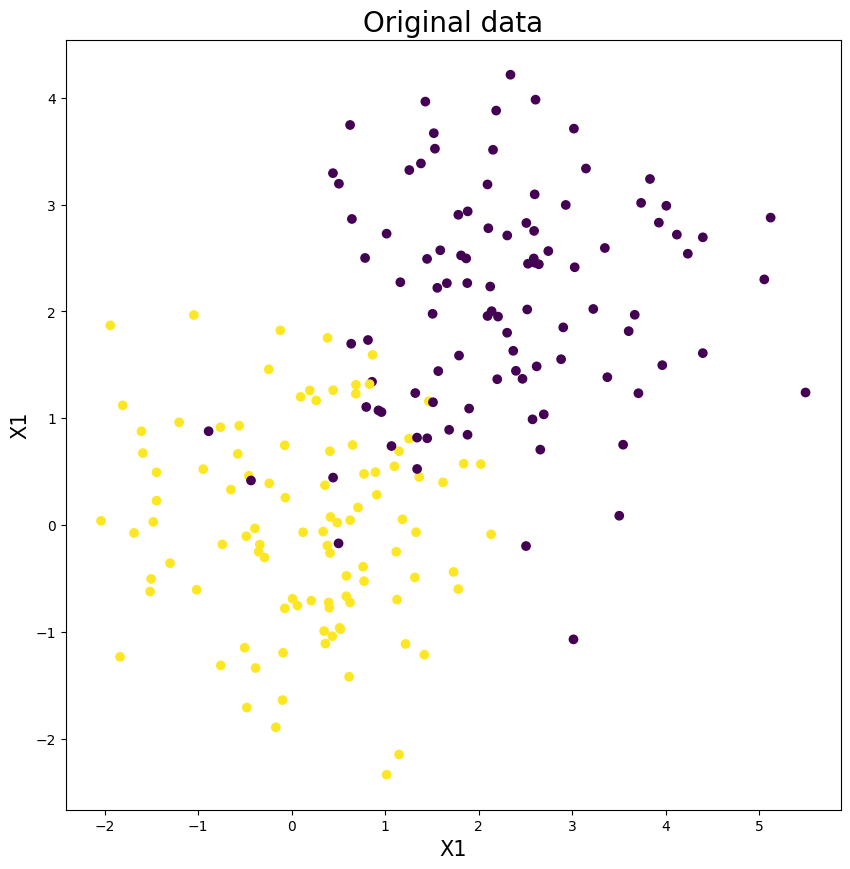

In [2]:
x,y = generate_data(ro=2)

plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel("X1", fontsize=15)
plt.ylabel("X1", fontsize=15)
plt.title("Original data", fontsize=20)
plt.show()

In [3]:
np.column_stack((x, np.ones(200))) # adding ones

array([[ 1.1199823 ,  1.81330569,  1.        ],
       [ 0.72842376,  2.29259085,  1.        ],
       [-0.47345148, -0.48196816,  1.        ],
       [-0.43316355, -0.08634729,  1.        ],
       [ 0.54084866, -0.6685142 ,  1.        ],
       [-1.12240533, -0.39883428,  1.        ],
       [ 0.38971919, -0.86274221,  1.        ],
       [ 2.11027971,  2.98049536,  1.        ],
       [ 1.33485997,  1.54257094,  1.        ],
       [ 3.13693395,  1.79830341,  1.        ],
       [-1.37177268, -0.61689564,  1.        ],
       [ 1.39569664, -0.4457721 ,  1.        ],
       [ 1.57165096,  1.17689376,  1.        ],
       [ 1.42492269,  1.42878325,  1.        ],
       [ 1.59202885, -0.10149896,  1.        ],
       [ 2.75652167,  1.00012363,  1.        ],
       [-0.64829037,  0.71328071,  1.        ],
       [ 0.34145386,  1.39564394,  1.        ],
       [ 1.18044508,  2.0353085 ,  1.        ],
       [-1.02876007, -0.0533556 ,  1.        ],
       [ 3.67808841,  0.68029502,  1.   

In [3]:
from Algorithm import CoordinateDescent

from scipy.sparse import csc_matrix

cd = CoordinateDescent(C=2)
cd.fit(csc_matrix(np.column_stack((x, np.ones(200)))),y)
#cd.fit(np.column_stack((x, np.ones(200))), y)

In [4]:
w = cd.process()

In [5]:
w # the last one is the bias

array([-0.41069167, -0.48045246,  0.83815685])

In [7]:
y_hat = (w[0:-1] @ x.T) + w[-1]
y_hat = sgn(y_hat)

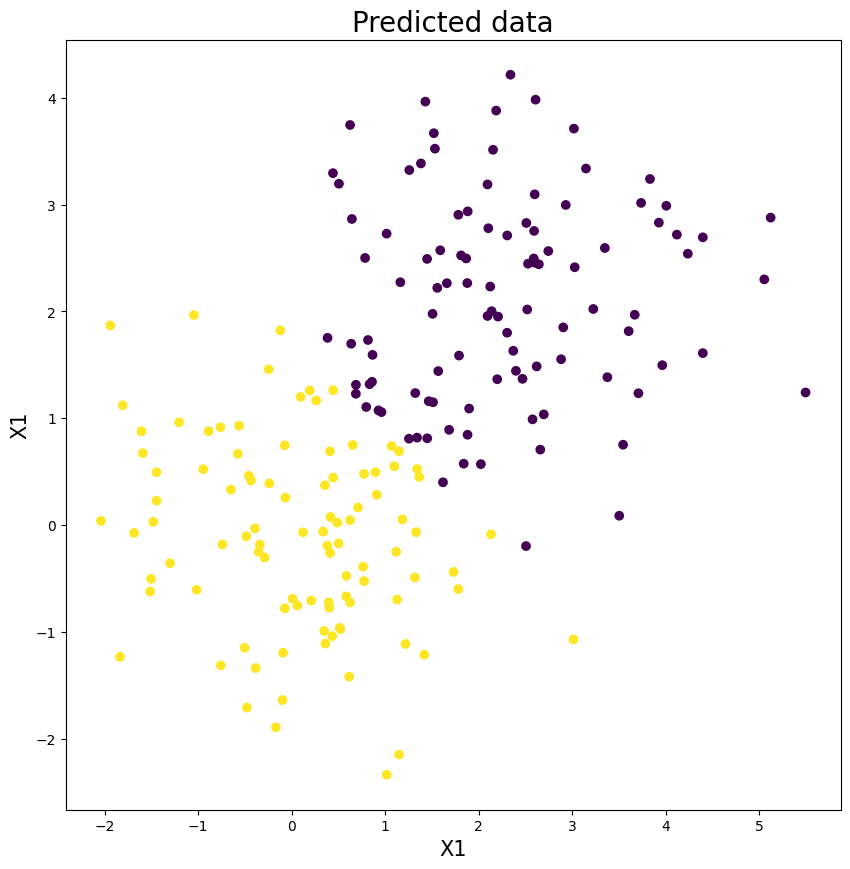

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=y_hat)
plt.xlabel("X1", fontsize=15)
plt.ylabel("X1", fontsize=15)
plt.title("Predicted data", fontsize=20)
plt.show()

In [9]:
accuracy(y, y_hat)

0.915